<a href="https://colab.research.google.com/github/navya04002/Navya-Agarwal/blob/main/Copy_of_Final_submission_NLP_Pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **📟Big Data Analytics - Individual Final Project**

**Submitted By:** Navya Agarwal

**GH Number:** GH1035199

**Submitted To:** Prof. Narjes Nikzad

**Module:** M508

**Programme:** MSc Data Science, AI, and Digital Business

**Objective:** Build an end-to-end machine learning pipeline for your choosen Business Problem

# **🔍Identifying AI-Generated vs Human-Generated Text**

## **Business Problem Understanding**

The Increase in the use of large language models (LLMs) like ChatGPT, Claude etc have made it difficult to create a difference between `Human written texts` and `AI generated texts`. This is a threat in academic integrity, content authenticity, journalism, and cybersecurity. Thus, our company wants to create an automated tool/system to identify if a given text is AI-generated or Human-written.

## **Business Value:**

- Avoids misinformation and plagiarism in educational and publishing platforms.

- Helps to flag AI-generated content and check the orignality of the content .

- Helps to verfiy authenticity in verification systems.

## **Souce of the Data**

https://www.kaggle.com/datasets/shanegerami/ai-vs-human-text/data

This is a Binary Classification Problem which has 2 claases as 0 and 1, where

**0 = Human written texts**

**1 =  AI generated texts**

We will solve the probelm by usign different type of models and the final evaluation will be based on the best model.

# **📱High-Level System Design**

The system is designed as an **end-to-end NLP pipeline** with the following components:

**1. Data Loading:** Importing libraries and dataset from the verfied source

**2. Exploratory Data Analysis:** Explore class distribution, text length, and linguistic patterns

**3. Train Test Split:** Splliting the dataset to insure there is not data leakage.

**4. Preprocessing:** Apply BERT tokenization for cleaning and assigned class weights due to imbalanced dataset.

**5. Feature Engineering:** BERT embeddings for deep learning models

**6. Modeling:** Use DistilBERT for contextual classification

**7. Evaluation:** Accuracy, Precision, Recall, F1-score, Confusion Matrix

**8. Final Discussion:** Strengths, Limitations and Recommendations


# **📃Importing Essential Libraries**

Importing essential libraries for handling data, preprocessing texts,visualizing the texts and training the model.

In [ ]:
!pip install gensim

In [ ]:
import re
import os
import torch
from torch import nn
import string
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot

from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix

from wordcloud import WordCloud
from transformers import DistilBertForSequenceClassification, DistilBertTokenizer, Trainer, TrainingArguments
print("All required libraries imported successfully.")

import warnings
warnings.filterwarnings('ignore')

All required libraries imported successfully.


# **📥Data Collection**

The dataset was downloaded directly from kaggle. It has a file named 'AI_Human.csv' which contain our data in cvs form.

In [ ]:
import kagglehub

path = kagglehub.dataset_download("shanegerami/ai-vs-human-text")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ai-vs-human-text


In [ ]:
os.listdir(path)
print(os.listdir(path))

['AI_Human.csv']


In [ ]:
df = pd.read_csv(os.path.join(path, 'AI_Human.csv'))
df.head()

,text,generated
0,Cars. Cars have been around since they became ...,0.0
1,Transportation is a large necessity in most co...,0.0
2,"""America's love affair with it's vehicles seem...",0.0
3,How often do you ride in a car? Do you drive a...,0.0
4,Cars are a wonderful thing. They are perhaps o...,0.0


**Inferences:** The dataset include file with 2 columns i.e a text column and a generated column.

Source of code: https://www.geeksforgeeks.org/python/python-os-path-join-method/

# **🔍Exploratory Data Analysis**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487235 entries, 0 to 487234
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   text       487235 non-null  object 
 1   generated  487235 non-null  float64
dtypes: float64(1), object(1)
memory usage: 7.4+ MB


**Inference:** The df.info() tells us that there are 487235 entries in the dataset adn there 2 2 different columns named `texts` and `generated`. It also shouws the type of the data and memory usage.

source of code: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html

In [ ]:
df.nunique()

,0
text,487235
generated,2


**Inference:** The generated column has 2 different classes which we will explore now.

source of code: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nunique.html

In [ ]:
df['generated'].value_counts()

,count
generated,
0.0,305797
1.0,181438


**Inference:** We can see here that the classes have different number of counts.
The texts written by human are more in number than the texts generated by AI. We can say that the AI is more precise in generating sentences while human tries to explaining everything in detail.

source of code: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html

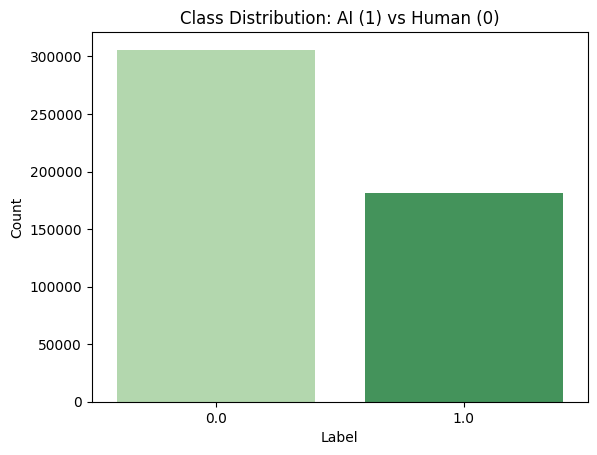

In [ ]:
sns.countplot(x='generated', data=df, palette='Greens')
plot.title("Class Distribution: AI (1) vs Human (0)")
plot.xlabel("Label")
plot.ylabel("Count")
plot.show()

**Inference:** The above visualization of the class distribution clearly shows that the dataset it highly imbalanced which can create problem while training the data. The model will be biased towards the majority class.

source of code: https://matplotlib.org/stable/api/pyplot_summary.html

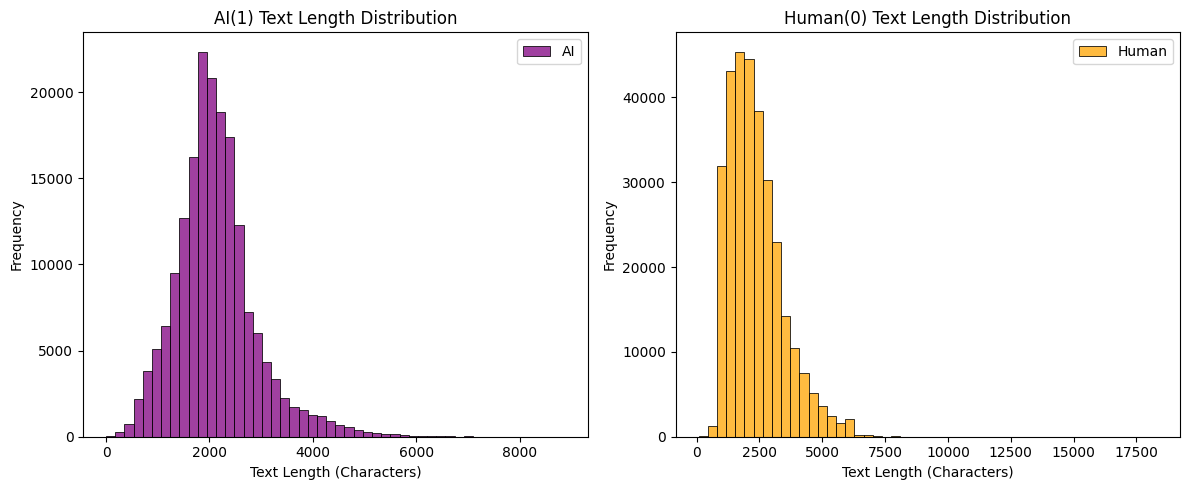

In [ ]:
df['Text_length'] = df['text'].apply(len)

plot.figure(figsize=(12, 5))

plot.subplot(1, 2, 1)
sns.histplot(df[df['generated'] == 1]['Text_length'], bins=50, color='purple', label='AI')
plot.title('AI(1) Text Length Distribution')
plot.xlabel('Text Length (Characters)')
plot.ylabel('Frequency')
plot.legend()


plot.subplot(1, 2, 2)
sns.histplot(df[df['generated'] == 0]['Text_length'], bins=50, color='orange', label='Human')
plot.title('Human(0) Text Length Distribution')
plot.xlabel('Text Length (Characters)')
plot.ylabel('Frequency')
plot.legend()

plot.tight_layout()
plot.show()

**Inference:** By the visual representation of the length of texts given by both classes, we can say that AI texts were more uniform than the human text which are variable in nature.

source of code: https://matplotlib.org/stable/api/pyplot_summary.html

In [ ]:
df = df.drop('Text_length', axis=1)

**Inference:** Dropping the text_length column as not needed for the training process.

source of code: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [ ]:
df_human = df[df['generated'] == 0]
df_ai = df[df['generated'] == 1]

df_human_sampled = df_human.sample(frac=0.1, random_state=100)
df_ai_sampled = df_ai.sample(frac=0.1, random_state=100)

df = pd.concat([df_human_sampled, df_ai_sampled])
df.shape

(48724, 2)

**Inference:** As we saw that the data size was too large which can create delayes in training the model, we will do sampling of the dataset. And to ensure that sampling covers most of the varied data, we will set random_state as 100.

source of code: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html

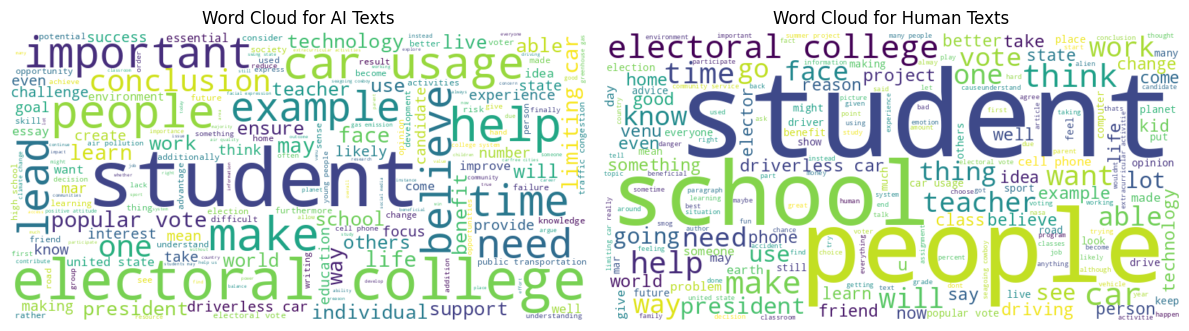

In [ ]:
ai_text = ' '.join(
    df[df['generated'] == 1]['text'].str.lower().str.replace(f"[{string.punctuation}]", "", regex=True))

human_text = ' '.join(df[df['generated'] == 0]['text'].str.lower().str.replace(f"[{string.punctuation}]", "", regex=True))

plot.figure(figsize=(12, 8))

plot.subplot(1, 2, 1)
wordcloud_ai = WordCloud(width=800, height=400, background_color='white').generate(ai_text)
plot.imshow(wordcloud_ai, interpolation='bilinear')
plot.axis('off')
plot.title('Word Cloud for AI Texts')

plot.subplot(1, 2, 2)
wordcloud_human = WordCloud(width=800, height=400, background_color='white').generate(human_text)
plot.imshow(wordcloud_human, interpolation='bilinear')
plot.axis('off')
plot.title('Word Cloud for Human Texts')

plot.tight_layout()
plot.show()

**Inference:** Creating word cloud helped us in getting the difference in vocabulary of texts given by both the classes.

source of code: https://www.geeksforgeeks.org/python/generating-word-cloud-python/

# **🪓Splitting the Data into Train & Test**

Splitting the dataset into train and test sets to avoid data leakage while pre-processing and training.

source of code: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
texts = df['text'].tolist()
labels = df['generated'].tolist()

x_train, x_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

print("Training data size:", len(x_train))
print("Testing data size:", len(x_test))
print("Training labels size:", len(y_train))
print("Testing labels size:", len(y_test))

Training data size: 38979
Testing data size: 9745
Training labels size: 38979
Testing labels size: 9745


# **⌛Preprocessing and Tokenization**


In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

train_encodings = tokenizer(x_train, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(x_test, truncation=True, padding=True, max_length=128)

**Inference:** Using Distil Bert Tokenizer to perform pre-processing of the texts and tokenize the texts with maximum length of 128.

No manual text cleaning was applied because the BERT model is capable of doing it on its own internally.

Lowercased, Stripped of punctuation, Tokenized, Lemmatization, Vectorized with TF-IDF (1-2 grams) using TfidfVectorizer are done when using a classical model like Logistic regression, SVM or MultinomialNB.

source of code: https://huggingface.co/docs/transformers/en/model_doc/bert

In [ ]:
class_weights = compute_class_weight(class_weight='balanced',
                                     classes=np.unique(y_train),
                                     y=y_train)

class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
class_weights = torch.tensor(class_weights, dtype=torch.float)

Inference: As we saw that the classes were highly imbalnced, we will assign class weights to balance the minority class so that there is no biassness in the model training part. And again this process will be odne only on the training set to prevent data leakage.

source of code: https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html

In [ ]:
class TextDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.encodings['input_ids'][idx]),
            'attention_mask': torch.tensor(self.encodings['attention_mask'][idx]),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

    def __len__(self):
        return len(self.labels)

train_dataset = TextDataset(train_encodings, y_train)
test_dataset = TextDataset(test_encodings, y_test)

**Inference:** We created the TextDataset class function to convert our tokenized inputs (input_ids, attention_mask) and corresponding labels to the format PyTorch and Hugging Face's Trainer accepts. As the BERT model will only accepts the tenosr format, we will convert and store them as dictonary of tensors.

It also ensures correct formatting of labels, as loss functions like CrossEntropyLoss depend on it. Without this, we will not be able to efficiently batch and train our model.

source of code: https://docs.pytorch.org/docs/stable/data.html

# **🖍️Define Model**

We will use distilbert-base-uncased because it is a faster, smaller and cheaper version of BERT. It is generally trained using a technique called knowledge distillation.

As we have limited hardware availablity on colab we will us this model which retains over 95% of BERT’s performance while simulanously being 40% smaller and 60% faster.

This model easily understand the context and word order and can differentiate between writing styles of human and AI. It learns from semantic patterns and not just from the word frequnecies.

source of code: https://huggingface.co/distilbert/distilbert-base-uncased

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)
model.to("cuda")

print(f"Loaded BERT tokenizer: {model}")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Loaded BERT tokenizer: DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout

# **🎮Model Training**

In [ ]:
class WeightedTrainer(Trainer):
    def __init__(self, class_weights, *args, **kwargs):
        super().__init__(*args, **kwargs)

        self.class_weights = class_weights.to(self.model.device)

This will help to set-up a trainer that uses the class weights , so that the model doesn't ignore the rare or the minority classes and store the class weighst on the same device as the model.

source of code; https://discuss.huggingface.co/t/training-with-class-weights/62614

In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=4,
    per_device_eval_batch_size=8,
    eval_strategy="epoch",
    logging_strategy="epoch",
    logging_dir="./logs",
    report_to="none",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=1)
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc}


trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    class_weights=class_weights
)

The training arguments were given to define that how the model should be trained such as the no. of epochs, batch size, logging, saving etc.

After that i have defined a function `compute_metrics` to calculate or evaluate the model performance. Now the trainer class brings everything together to manage the training and evaluation process automatically. After each epochs it will calcuate the accuracy of the trained dataset.

source of code: https://huggingface.co/docs/transformers/en/main_classes/trainer

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.127100,0.072687,0.985942
2,0.036700,0.053106,0.991791
3,0.009100,0.062253,0.991380


TrainOutput(global_step=29235, training_loss=0.05764055612537011, metrics={'train_runtime': 2022.2462, 'train_samples_per_second': 57.825, 'train_steps_per_second': 14.457, 'total_flos': 3872585049159168.0, 'train_loss': 0.05764055612537011, 'epoch': 3.0})

This steps starts the training process and fine-tunes the distilBERT model on the labeled training data.

# **📊Model Evaluation**

In [ ]:
results = trainer.evaluate()
print(f"BERT Model Accuracy: {results['eval_accuracy']}")

BERT Model Accuracy: 0.9917906618778861


The model selected the best accuracy which was on epoch 2nd.

In [ ]:
y_pred = trainer.predict(test_dataset)
preds = torch.argmax(torch.tensor(y_pred.predictions), axis=1)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6083
         1.0       0.99      0.99      0.99      3662

    accuracy                           0.99      9745
   macro avg       0.99      0.99      0.99      9745
weighted avg       0.99      0.99      0.99      9745



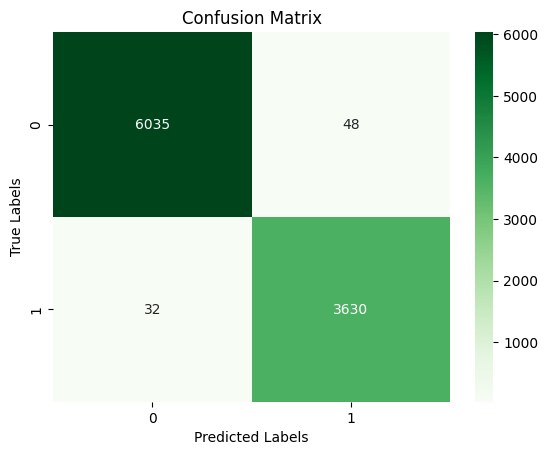

In [ ]:
print(classification_report(y_test, preds.numpy()))

cm = confusion_matrix(y_test, preds.numpy())

sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plot.title('Confusion Matrix')
plot.xlabel('Predicted Labels')
plot.ylabel('True Labels')
plot.show()

By the confusion matrix we can clearly see that the precision and reccall for both the classes where identified precisly. The model was able to understand and differentiate between the text written by human and generated by ai. For more better accuracy we can work with a large dataset and the hardware which support the workinf or it.

source of code: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

# **✔️Final Discussion**

I tried different models like **Logistic regression**, **multinominal naive bias** and **BertForSequenceClassification** ("bert-base-uncased"). Each model was either struglging with low accuracy or metrics like precision and recall or a very high run-time. These models are limited to shallow features like word frequencies and have a lack of understanding for word context or orders.

I even tried **combining BERT model** with **simpler models like Logistic regression** to get a better results but BERT is a powerful and a heavy model,it takes large number of parameters, it has slower inference and also requires a very higher GPU memory.

So, I chose to go with **DistilBertForSequenceClassification ("distilbert-base-uncased")** which was faster and smaller as compared to the other BERT models while maintaining the BERT's performance. This makes it an ideal choice for real-world deployment where resources are limited.


### **Strengths**

- Achieved netter accuracy than other models even when the sample size was small.

- The architecture of the model generalises well withough doing manual preprocessing and feature engineering.

### **Limitations**

- The AI generators will continue to get better in future, and thus require model retraining to get a better designed system.

- Dataset could fail to generalize to the future large language model's behavior like GPT-5 or Claude 3.

### **Recommendations**

- Update the dataset with latest AI generated content so that the evaluation and traing can be done perfectly and aligns well with the goal of the company.

- Combining BERT model with simpler models like Logistic regression will help in making the system more accurate with a better harware system, so that it reduces the run-time.

- We can deploy this model as a web service(API) so that the other useres can also send texts to it and get predictions.

- We can also add a confidence threshold, so when a model makes predcition, it's confidence score will allow the user to trust the results.